In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

# Percentiles
Numerical data can be sorted in increasing or decreasing order. Thus the values of a numerical data set have a *rank order*. A percentile is the value at a particular rank.

For example, if your score on a test is on the 95th percentile, a common interpretation is that only 5% of the scores were higher than yours. The median is the 50th percentile; it is commonly assumed that 50% the values in a data set are above the median.

But some care is required in giving percentiles a precise definition that works for all ranks and all lists. To see why, consider an extreme example where all the students in a class score 75 on a test. Then 75 is a natural candidate for the median, but it's not true that 50% of the scores are above 75. Also, 75 is an equally natural candidate for the 95th percentile or the 25th or any other percentile. Ties – that is, equal data values – have to be taken into account when defining percentiles.

You also have to be careful about exactly how far up the list to go when the relevant index isn't clear. For example, what should be the 87th percentile of a collection of 10 values? The 8th value of the sorted collection, or the 9th, or somewhere in between?

In this section, we will give a definition that works consistently for all ranks and all lists.

## A Numerical Example
Before giving a general definition of all percentiles, we will define the 80th percentile of a collection of values to be the smallest value in the collection that is at least as large as 80% of all of the values.

For example, let's consider the sizes of the five largest continents – Africa, Antarctica, Asia, North America, and South America – rounded to the nearest million square miles.

In [2]:
sizes = make_array(12, 17, 6, 9, 7)

The 80th percentile is the smallest value that is at least as large as 80% of the elements of `sizes`, that is, four-fifths of the five elements. That's 12:

In [3]:
np.sort(sizes)

array([ 6,  7,  9, 12, 17])

The 80th percentile is a value on the list, namely 12. You can see that 80% of the values are less than or equal to it, and that it is the smallest value on the list for which this is true.

Analogously, the 70th percentile is the smallest value in the collection that is at least as large as 70% of the elements of `sizes`. Now 70% of 5 elements is "3.5 elements", so the 70th percentile is the 4th element on the list. That's 12, the same as the 80th percentile for these data.

## The `percentile` function
The `percentile` function takes two arguments: a rank between 0 and 100, and a array. It returns the corresponding percentile of the array.

In [4]:
percentile(70, sizes)

12

### The General Definition ###

Let $p$ be a number between 0 and 100. The $p$th percentile of a collection is the smallest value in the collection that is at least as large as p% of all the values.

By this definition, any percentile between 0 and 100 can be computed for any collection of values, and it is always an element of the collection. 

In practical terms, suppose there are $n$ elements in the collection. To find the $p$th percentile:
- Sort the collection in increasing order.
- Find p% of n: $(p/100) \times n$. Call that $k$.
- If $k$ is an integer, take the $k$th element of the sorted collection.
- If $k$ is not an integer, round it up to the next integer, and take that element of the sorted collection.

### Example ###
The table `scores_and_sections` contains one row for each student in a class of 359 students. The columns are the student's discussion section and midterm score. 

In [5]:
scores_and_sections = Table.read_table(path_data + 'scores_by_section.csv')
scores_and_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


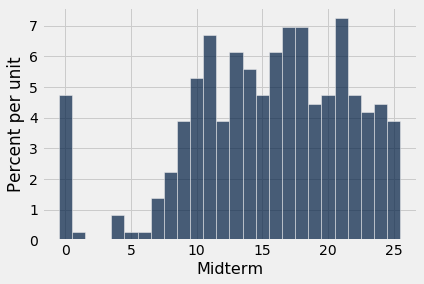

In [6]:
scores_and_sections.select('Midterm').hist(bins=np.arange(-0.5, 25.6, 1))

What was the 85th percentile of the scores? To use the `percentile` function, create an array `scores` containing the midterm scores, and find the 85th percentile:

In [7]:
scores = scores_and_sections.column(1)

In [8]:
percentile(85, scores)

22

According to the percentile function, the 85th percentile was 22. To check that this is consistent with our new definition, let's apply the definition directly.

First, put the scores in increasing order:

In [9]:
sorted_scores = np.sort(scores_and_sections.column(1))

There are 359 scores in the array. So next, find 85% of 359, which is 305.15. 

In [10]:
0.85 * 359

305.15

That's not an integer. By our definition, the 85th percentile is the 306th element of `sorted_scores`, which, by Python's indexing convention, is item 305 of the array.

In [11]:
# The 306th element of the sorted array

sorted_scores.item(305)

22

That's the same as the answer we got by using `percentile`. In future, we will just use `percentile`.

## Quartiles
The *first quartile* of a numercial collection is the 25th percentile. The terminology arises from *the first quarter*. The second quartile is the median, and the third quartile is the 75th percentile.

For our `scores` data, those values are:

In [12]:
percentile(25, scores)

11

In [13]:
percentile(50, scores)

16

In [14]:
percentile(75, scores)

20

Distributions of scores are sometimes summarized by the "middle 50%" interval, between the first and third quartiles. 